In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data directly from sklearn for convenience and clean feature/target separation
data = load_breast_cancer(as_frame=True)
df = data.frame

In [2]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
# Target variable (y): 0 = Malignant, 1 = Benign
X = df.drop(columns=['target'])
y = df['target']

# Split data into 70% training and 30% testing, using 'stratify' to ensure
# both sets have the same proportion of malignant/benign cases.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardization (Z-score normalization) is essential for Logistic Regression 
# because it relies on distance calculations (implicit in the optimization process).
scaler = StandardScaler()

# Fit the scaler ONLY on the training data to prevent data leakage 
X_train_scaled = scaler.fit_transform(X_train)

# Transform both training and testing sets
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame 
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("Data preparation complete.")
print(f"Training set features shape: {X_train_scaled_df.shape}")
print(f"Testing set features shape: {X_test_scaled_df.shape}")

Data preparation complete.
Training set features shape: (398, 30)
Testing set features shape: (171, 30)


In [5]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Initialize the Logistic Regression model
# set max_iter to ensure convergence, especially with standardized data.
model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

# Train the model using the scaled training data
model.fit(X_train_scaled_df, y_train)

# --- Output Model Information ---
print("--- Model Training Complete ---")
print(f"Model Intercept (Bias, Beta_0): {model.intercept_[0]:.4f}")
# Display the coefficients (weights) assigned to each feature
print("\nTop 5 Feature Coefficients (Beta_i):")
coefficients = pd.Series(model.coef_[0], index=X_train_scaled_df.columns)
print(coefficients.abs().sort_values(ascending=False).head(5))

# Make predictions on the test set (needed for the next evaluation step)
y_pred = model.predict(X_test_scaled_df)
y_pred_proba = model.predict_proba(X_test_scaled_df)[:, 1]

print("\nPredictions (y_pred) and Probabilities (y_pred_proba) made on the test set.")

--- Model Training Complete ---
Model Intercept (Bias, Beta_0): 0.1776

Top 5 Feature Coefficients (Beta_i):
worst texture           1.212907
worst concave points    0.990615
worst area              0.975691
area error              0.954816
worst radius            0.938634
dtype: float64

Predictions (y_pred) and Probabilities (y_pred_proba) made on the test set.


--- Confusion Matrix ---
True Malignant (0) | False Benign (1)
-------------------------------------
Pred 0 (Malignant): 63 | 1
Pred 1 (Benign):    1 | 106

--- Classification Report ---
               precision    recall  f1-score   support

Malignant (0)       0.98      0.98      0.98        64
   Benign (1)       0.99      0.99      0.99       107

     accuracy                           0.99       171
    macro avg       0.99      0.99      0.99       171
 weighted avg       0.99      0.99      0.99       171

Area Under the ROC Curve (ROC-AUC): 0.9981


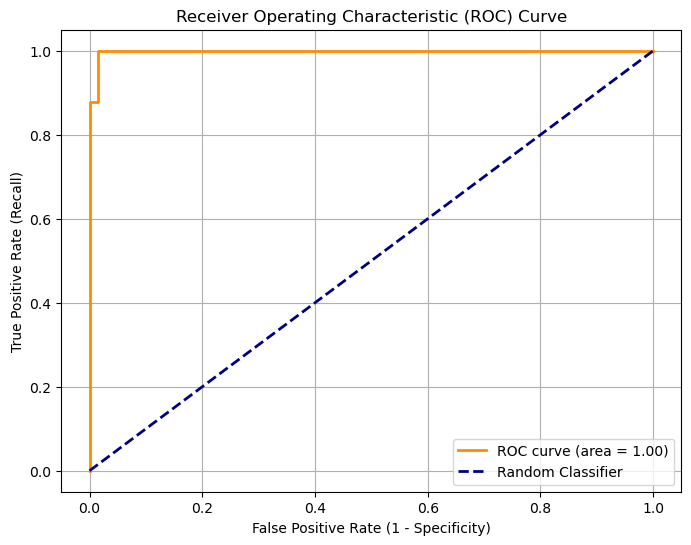

In [6]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# --- 1. Confusion Matrix and Classification Report ---

# Generate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("--- Confusion Matrix ---")
# Labels for the matrix: 0=Malignant, 1=Benign
print("True Malignant (0) | False Benign (1)")
print("-------------------------------------")
print(f"Pred 0 (Malignant): {cm[0, 0]} | {cm[0, 1]}")
print(f"Pred 1 (Benign):    {cm[1, 0]} | {cm[1, 1]}\n")

# Display the Classification Report (includes Precision, Recall, F1-Score, and Accuracy)
print("--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Malignant (0)', 'Benign (1)']))

# --- 2. ROC Curve and AUC Score ---

# Calculate the Area Under the Curve (AUC)
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"Area Under the ROC Curve (ROC-AUC): {auc_score:.4f}")

# Calculate ROC curve values for plotting
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

--- Threshold Tuning ---
Threshold for Max F1-Score: 0.3690

--- Evaluation with New Threshold (0.45) ---
               precision    recall  f1-score   support

Malignant (0)       0.98      0.98      0.98        64
   Benign (1)       0.99      0.99      0.99       107

     accuracy                           0.99       171
    macro avg       0.99      0.99      0.99       171
 weighted avg       0.99      0.99      0.99       171



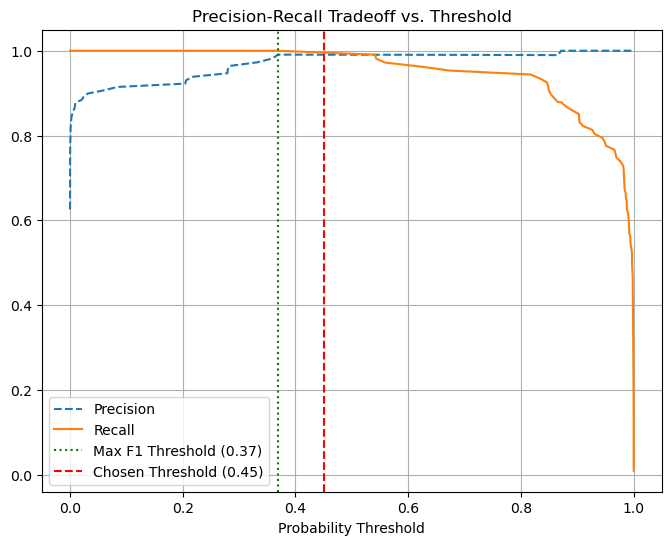

In [7]:
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt

# Calculating precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Finding the Optimal Threshold 
# Goal: Find the threshold where Recall for Class 1 (Benign) is high, 
# or where Precision and Recall are balanced (e.g., maximizing F1-score, 
# or prioritizing recall for the *minority/critical* class).

# In this example, let's find the point where Precision and Recall are roughly equal
f1_scores = 2 * (precision * recall) / (precision + recall)
best_f1_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[best_f1_idx] 

print("--- Threshold Tuning ---")
print(f"Threshold for Max F1-Score: {optimal_threshold:.4f}")

# Applying New Threshold 
# Let's manually set a slightly lower threshold (e.g., 0.45) 
# to potentially increase the Recall for the critical Malignant (0) class 
# (or increase the recall for Benign (1), depending on how we define the critical outcome).

new_threshold = 0.45 
y_pred_tuned = (y_pred_proba >= new_threshold).astype(int)

# Re-evaluate with the new threshold
from sklearn.metrics import classification_report

print(f"\n--- Evaluation with New Threshold ({new_threshold}) ---")
print(classification_report(y_test, y_pred_tuned, target_names=['Malignant (0)', 'Benign (1)']))

# --- 3. Visualize Precision-Recall Tradeoff ---
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', linestyle='--')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.axvline(x=optimal_threshold, color='green', linestyle=':', label=f'Max F1 Threshold ({optimal_threshold:.2f})')
plt.axvline(x=new_threshold, color='red', linestyle='--', label=f'Chosen Threshold ({new_threshold})')
plt.title('Precision-Recall Tradeoff vs. Threshold')
plt.xlabel('Probability Threshold')
plt.legend()
plt.grid(True)
plt.show()